In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn.decomposition import PCA 

In [2]:
#Importing Dataset
df = pd.read_csv("mushroom.csv")

In [3]:
#Data Preprocessing
print("\nData Info : ")
print(df.info())
print("\nData Shape : ")
print(df.shape)
print("\nData Description : ")
print(df.describe()) 
print("\nInitial Values of data : ")
print(df.head()) 

df = df.drop("Unnamed: 0",axis=1)

cat_features = df.select_dtypes(include=["object"]).columns.drop("class")
num_features = df.select_dtypes(include=["int64","float64"]).columns


Data Info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 

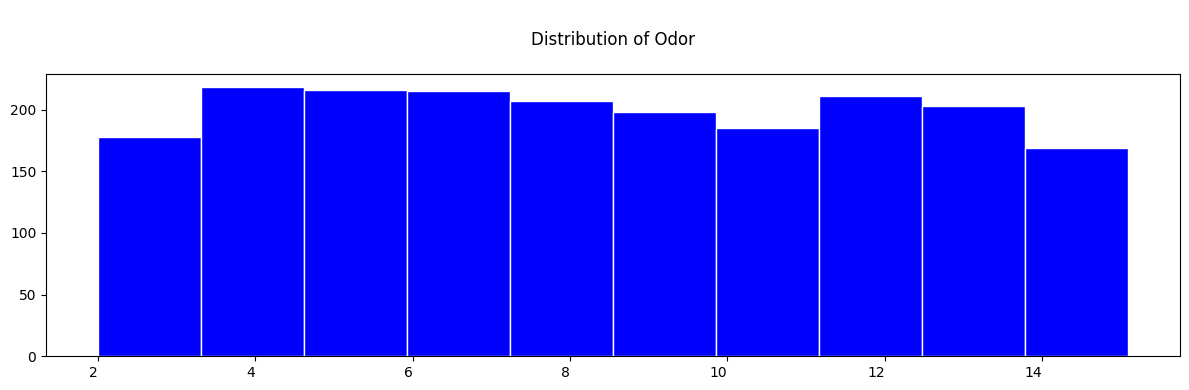

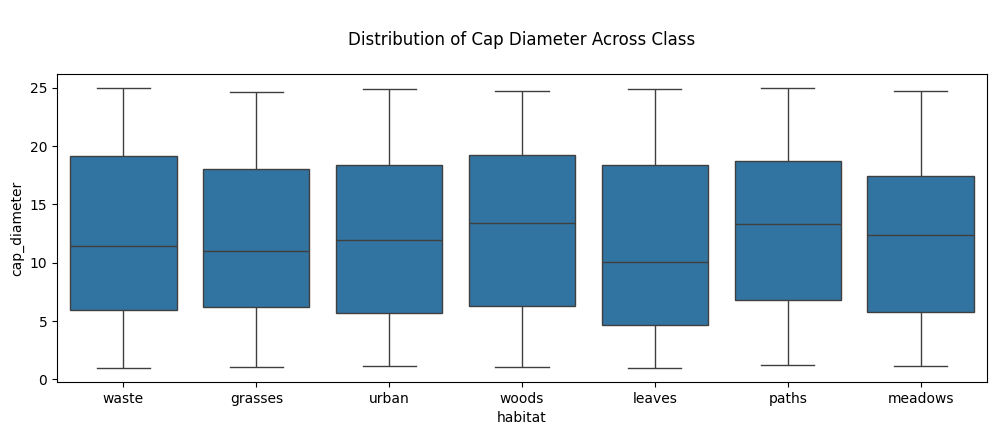

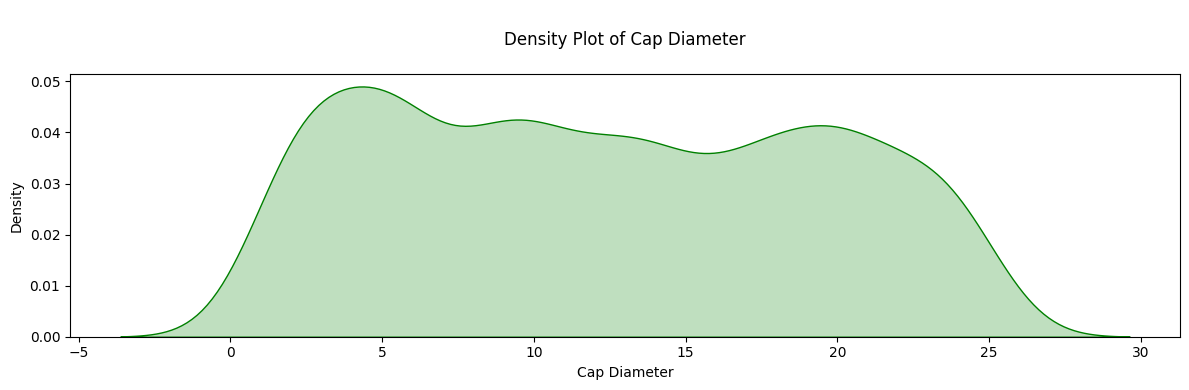

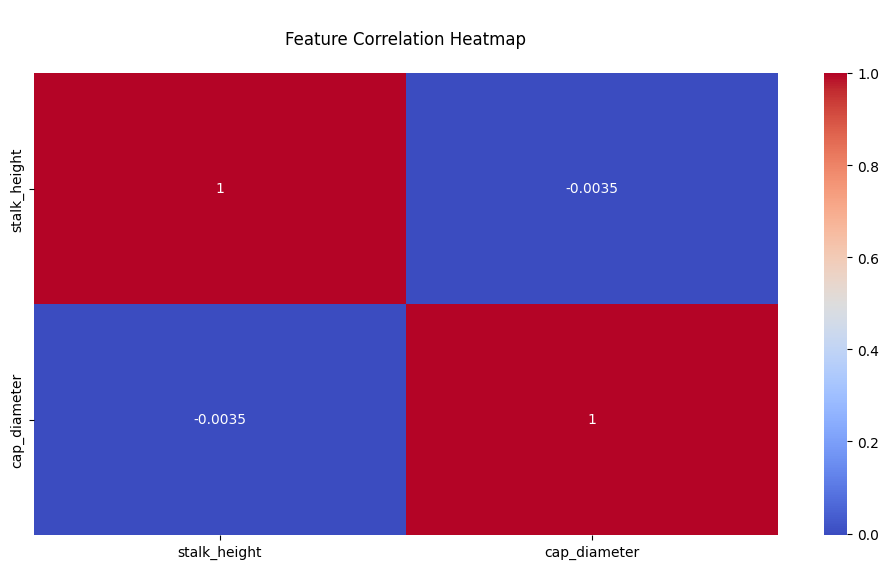

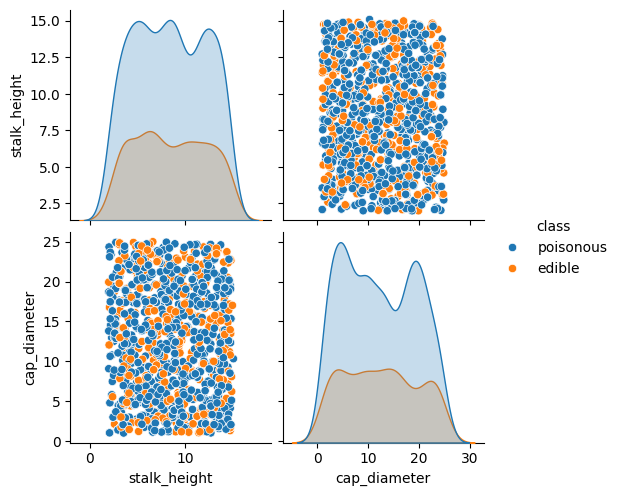

In [4]:
#Data Visualizations
plt.figure(figsize=(12,4))
plt.hist(df["stalk_height"],color="Blue",edgecolor="White")
plt.title("\nDistribution of Odor\n")
plt.xticks(ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,4))
sns.boxplot(x="habitat",y="cap_diameter",data=df)
plt.title("\nDistribution of Cap Diameter Across Class\n")
plt.show()

plt.figure(figsize=(12,4))
sns.kdeplot(data=df,x="cap_diameter",fill=True,color="Green")
plt.xlabel("Cap Diameter")
plt.ylabel("Density")
plt.title("\nDensity Plot of Cap Diameter\n")
plt.tight_layout()
plt.show()

corr = df[num_features].corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.title("\nFeature Correlation Heatmap\n")
plt.show()

sns.pairplot(df[["stalk_height","cap_diameter","class"]],hue="class")
plt.show()

In [5]:
#Encoding and Scaling , Train-Test Split
df = pd.get_dummies(df,columns=cat_features,drop_first=True)
#scaler = StandardScaler()
#df[num_features]=scaler.fit_transform(df[num_features])

#df = pd.get_dummies(df,columns=cat_features,drop_first=True)

X = df.drop("class",axis=1)
y = df["class"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

In [6]:
#Create SVM Model
svm_model = SVC(kernel="linear",random_state=42)
svm_model.fit(X_train,y_train)

y_pred = svm_model.predict(X_test)

print("\nSVM Evaulation Metrics\n")
print("\nAccuracy Score : ",accuracy_score(y_test,y_pred))
print("\nPrecision Score : ",precision_score(y_test,y_pred,average="weighted"))
print("\nRecall Score : ",recall_score(y_test,y_pred,average="weighted"))
print("\nF1 Score : ",f1_score(y_test,y_pred,average="weighted"))
print("\nConfusion Matrix : \n",confusion_matrix(y_test,y_pred))


SVM Evaulation Metrics


Accuracy Score :  0.6675

Precision Score :  0.44555625

Recall Score :  0.6675

F1 Score :  0.5344002998500749

Confusion Matrix : 
 [[  0 133]
 [  0 267]]


C:\Users\Aarush\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


C:\Users\Aarush\AppData\Local\Temp\ipykernel_30160\2124574105.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_test_2D[:,0],X_test_2D[:,1],c=colors,cmap="viridis",alpha=0.7)


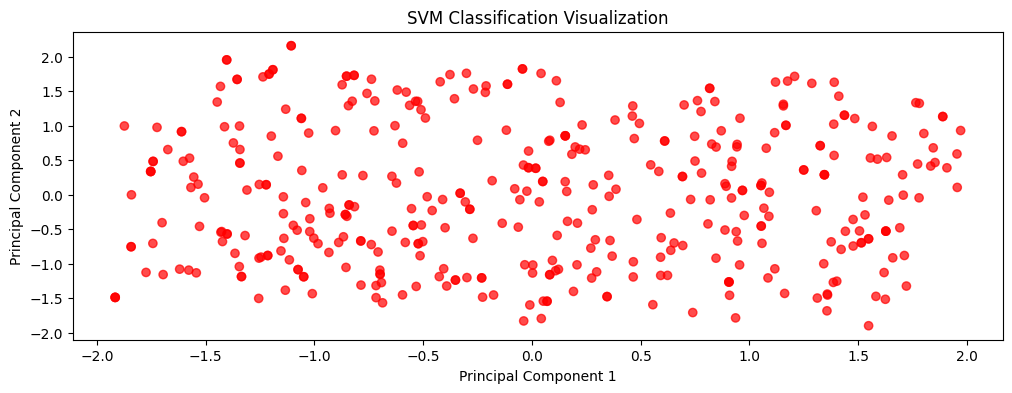

In [7]:
#Principal Component Analysis
if X_train.shape[1] >= 2 :
    pca = PCA(n_components=2)
    X_test_2D = pca.fit_transform(X_test)

    y_pred = svm_model.predict(X_test)

    color_map = {"poisonous" : "red","edible" : "green"}
    colors = [color_map[label] for label in y_pred]
    plt.figure(figsize=(12,4))
    plt.scatter(X_test_2D[:,0],X_test_2D[:,1],c=colors,cmap="viridis",alpha=0.7)
    plt.title("SVM Classification Visualization")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

In [8]:
#Hyperparameter Tuning
param_grid = {
    "kernel" : ["linear","rbf","poly","sigmoid"],
    "C" : [0.1,1,10],
    "gamma" : ["scale","auto"]
}

grid_search = GridSearchCV(estimator=SVC(random_state=42),param_grid=param_grid,scoring="accuracy",cv=5,n_jobs=-1)

grid_search.fit(X_train,y_train)
print("\nBest Parameters : ",grid_search.best_params_)
print("\nBest Cross Validation Accuracy : ",grid_search.best_score_)

best_svm = grid_search.best_estimator_
print("\nBest SVM : ",best_svm)
y_pred1 = best_svm.predict(X_test)

print("\nTest Accuracy : ",accuracy_score(y_test,y_pred1))


Best Parameters :  {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}

Best Cross Validation Accuracy :  0.84375

Best SVM :  SVC(C=1, kernel='poly', random_state=42)

Test Accuracy :  0.8875


In [9]:
#SVM Kernel Comparison

kernels = ["linear","poly","rbf","sigmoid"]
results = {}

for kernel in kernels :
    model = SVC(kernel=kernel,C=1,gamma="scale",random_state=42)
    model.fit(X_train,y_train)
    y_pred2 = model.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred2)
    precision = precision_score(y_test,y_pred2,average="weighted")
    recall = recall_score(y_test,y_pred2,average="weighted")
    f1 = f1_score(y_test,y_pred2,average="weighted")
    
    results[kernel] = {
        "Accuracy" : accuracy,
        "Precision" : precision,
        "Recall" : recall,
        "F1" : f1
    }

results_df = pd.DataFrame(results)
print("\nSVM Kernel Comparison : \n")
print(results_df)

C:\Users\Aarush\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])



SVM Kernel Comparison : 

             linear      poly       rbf   sigmoid
Accuracy   0.667500  0.887500  0.820000  0.622500
Precision  0.445556  0.894625  0.846801  0.452257
Recall     0.667500  0.887500  0.820000  0.622500
F1         0.534400  0.882437  0.800200  0.516062


In [ ]:
"""1. Compare SVM performance with various kernels (linear, polynomial, RBF).

Linear kernel works well when data is linearly separable.

It trains faster and is good for high-dimensional datasets.

But it performs poorly when decision boundaries are non-linear.

Polynomial kernel can model more complex boundaries.

Higher degrees capture curves but increase risk of overfitting.

It is slower compared to linear SVM.

RBF (Gaussian) kernel is the most powerful and flexible.

It handles non-linear patterns by projecting data into higher dimensions.

Often gives the best accuracy in real-world datasets.

But it needs proper tuning of C and gamma to avoid overfitting.

2. Analyze SVM strengths & weaknesses for the Mushroom dataset (based on typical EDA/visualization results).

Mushroom dataset is mostly clean, balanced, and categorical in nature.

After encoding, SVM can learn patterns well due to clear separability.

RBF kernel usually performs the best because relationships are non-linear.

SVM handles the high-dimensional one-hot encoded features effectively.

It gives strong accuracy and tight decision boundaries.

But SVM training can be slow on large one-hot vectors.

Linear kernel performs worse because mushrooms aren’t linearly separable.

SVM struggles with purely categorical data before proper encoding.

Visualizations show clusters that are curved, fitting RBF better.

Overall: high accuracy but computationally heavier than trees.

3. Practical implications of SVM in real-world classification tasks.

SVM is powerful for tasks with clear margins between classes.

Works well for high-dimensional data like text, images, and gene data.

The kernel trick allows SVM to learn complex, non-linear boundaries.

It is robust to outliers due to the margin-maximizing nature.

Requires careful tuning of C and gamma for best performance.

Training time becomes high as dataset size grows.

Hard to interpret compared to decision trees.

Performs well when number of features > number of samples.

Memory usage may be high because of support vectors.

Overall: very accurate for medium-size datasets, but less scalable than simpler models."""